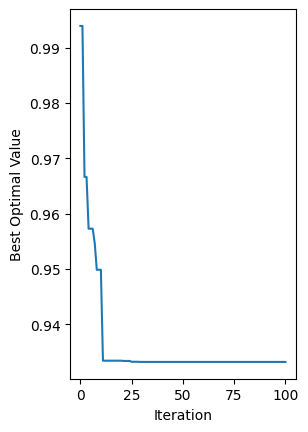

Toff: 59.01731580983978; Ton: 5.0; Sv: 80.0; Ip: 150.0
KW: 318.48170954508373; PCV: 0.8618181307486008; SR: 5.580147035887387; ED: 20.650746668270024; LE: 490.0927929788567; CE: 266.28445210318216
Best Optimal(Z): 0.9332404664846322


In [45]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

vishnu = 0

c1 = 307.5391 # Example constant values
c2 = 6.76912000000
c3 = 3.94630000000
c4 = 19.641450000
c5 = 441.73950485990
c6 = 238.539750279

def switch_vishnu(vishnu):
    switch_dict = {
        0: (1/6,1/6,1/6,1/6,1/6,1/6),
        1: (1, 0, 0, 0, 0, 0),
        2: (0, 1, 0, 0, 0, 0),
        3: (0, 0, 1, 0, 0, 0),
        4: (0, 0, 0, 1, 0, 0),
        5: (0, 0, 0, 0, 1, 0),
        6: (0, 0, 0, 0, 0, 1)
    }

    return switch_dict.get(vishnu, (0, 0, 0, 0, 0, 0))


def switch_case(vishnu):
    switch_dict = {
        1: 'KW',
        2: 'PCV',
        3: 'SR',
        4: 'ED',
        5: 'LE',
        6: 'CE'
    }

    return switch_dict.get(vishnu, '')
# Example usage:

w1, w2, w3, w4, w5, w6 = switch_vishnu(vishnu)

# Define your objective function here
def objective_function_multi(x):
    Toff, Ton, Sv, Ip = x
    KW = 81 + 6.66*Toff + 0.19*Ton + 0.665*Sv + 0.311*Ip - 0.0522*Toff*Toff + 0.0002*Ton*Ton - 0.00044*Sv*Sv - 0.000293*Ip*Ip - 0.0060*Toff*Ton - 0.00346*Toff*Sv - 0.00413*Toff*Ip- 0.00025*Ton*Sv + 0.00727*Ton*Ip - 0.00132*Sv*Ip
    PCV = 29.8 - 0.942*Toff + 0.327*Ton - 0.1848*Sv + 0.0769*Ip + 0.00733*Toff*Toff + 0.00018*Ton*Ton + 0.000505*Sv*Sv + 0.000006*Ip*Ip - 0.00321*Toff*Ton + 0.002936*Toff*Sv - 0.001016*Toff*Ip - 0.002419*Ton*Sv + 0.000788*Ton*Ip - 0.000348*Sv*Ip
    SR = -55.7 + 1.97*Toff + 1.011*Ton + 0.223*Sv + 0.123*Ip - 0.0195*Toff*Toff - 0.00414*Ton*Ton - 0.00223*Sv*Sv - 0.000372*Ip*Ip - 0.00998*Toff*Ton + 0.00155*Toff*Sv - 0.00050*Toff*Ip - 0.00574*Ton*Sv + 0.003548*Ton*Ip - 0.000498*Sv*Ip
    ED = 56.3 - 1.93*Toff + 0.908*Ton + 0.575*Sv + 0.230*Ip + 0.0161*Toff*Toff + 0.00243*Ton*Ton - 0.00221*Sv*Sv - 0.000953*Ip*Ip - 0.00252*Toff*Ton - 0.00391*Toff*Sv + 0.00025*Toff*Ip - 0.00929*Ton*Sv + 0.001208*Ton*Ip - 0.000628*Sv*Ip
    LE= 213 + 2.5*Toff + 1.17*Ton + 0.35*Sv + 1.882*Ip + 0.018*Toff*Toff + 0.1621*Ton*Ton - 0.0034*Sv*Sv + 0.00035*Ip*Ip - 0.0413*Toff*Ton + 0.0088*Toff*Sv - 0.0246*Toff*Ip - 0.0017*Ton*Sv - 0.02156*Ton*Ip - 0.00285*Sv*Ip
    CE = 17673 - 578*Toff + 37.1*Ton - 20.4*Sv + 3.9*Ip + 4.83*Toff*Toff - 0.282*Ton*Ton - 0.032*Sv*Sv - 0.0235*Ip*Ip - 0.837*Toff*Ton + 0.476*Toff*Sv - 0.019*Toff*Ip - 0.194*Ton*Sv + 0.342*Ton*Ip - 0.0439*Sv*Ip

    # Calculate the objective value
    optimal = w1 * KW / c1 - w2 * PCV / c2 + w3 * SR / c3 + w4 * ED / c4 + w5 * LE / c5 + w6 * CE / c6

    return optimal

def objective_function_single(x):
    Toff, Ton, Sv, Ip = x
    KW = 81 + 6.66*Toff + 0.19*Ton + 0.665*Sv + 0.311*Ip - 0.0522*Toff*Toff + 0.0002*Ton*Ton - 0.00044*Sv*Sv - 0.000293*Ip*Ip - 0.0060*Toff*Ton - 0.00346*Toff*Sv - 0.00413*Toff*Ip- 0.00025*Ton*Sv + 0.00727*Ton*Ip - 0.00132*Sv*Ip
    PCV = 29.8 - 0.942*Toff + 0.327*Ton - 0.1848*Sv + 0.0769*Ip + 0.00733*Toff*Toff + 0.00018*Ton*Ton + 0.000505*Sv*Sv + 0.000006*Ip*Ip - 0.00321*Toff*Ton + 0.002936*Toff*Sv - 0.001016*Toff*Ip - 0.002419*Ton*Sv + 0.000788*Ton*Ip - 0.000348*Sv*Ip
    SR = -55.7 + 1.97*Toff + 1.011*Ton + 0.223*Sv + 0.123*Ip - 0.0195*Toff*Toff - 0.00414*Ton*Ton - 0.00223*Sv*Sv - 0.000372*Ip*Ip - 0.00998*Toff*Ton + 0.00155*Toff*Sv - 0.00050*Toff*Ip - 0.00574*Ton*Sv + 0.003548*Ton*Ip - 0.000498*Sv*Ip
    ED = 56.3 - 1.93*Toff + 0.908*Ton + 0.575*Sv + 0.230*Ip + 0.0161*Toff*Toff + 0.00243*Ton*Ton - 0.00221*Sv*Sv - 0.000953*Ip*Ip - 0.00252*Toff*Ton - 0.00391*Toff*Sv + 0.00025*Toff*Ip - 0.00929*Ton*Sv + 0.001208*Ton*Ip - 0.000628*Sv*Ip
    LE= 213 + 2.5*Toff + 1.17*Ton + 0.35*Sv + 1.882*Ip + 0.018*Toff*Toff + 0.1621*Ton*Ton - 0.0034*Sv*Sv + 0.00035*Ip*Ip - 0.0413*Toff*Ton + 0.0088*Toff*Sv - 0.0246*Toff*Ip - 0.0017*Ton*Sv - 0.02156*Ton*Ip - 0.00285*Sv*Ip
    CE = 17673 - 578*Toff + 37.1*Ton - 20.4*Sv + 3.9*Ip + 4.83*Toff*Toff - 0.282*Ton*Ton - 0.032*Sv*Sv - 0.0235*Ip*Ip - 0.837*Toff*Ton + 0.476*Toff*Sv - 0.019*Toff*Ip - 0.194*Ton*Sv + 0.342*Ton*Ip - 0.0439*Sv*Ip

    # Calculate the objective value
    optimal = w1 * KW - w2 * PCV + w3 * SR + w4 * ED + w5 * LE + w6 * CE
    return optimal


# Problem settings
lb = np.array([51, 5, 40, 70])
ub = np.array([63, 25, 80, 150])


Np = 500  # Population size
T = 100  # No. of iteration
D = len(lb)  # Number of dimensions



# Initialize statistical data storage
AllStats = [None]*1
AllEvals = np.full((Np*T, 1), np.nan)
AllBestFitness = np.full(1, np.nan)
AllBestSol = np.full((1, len(lb)), np.nan)

run = 0

# Starting of ABC
f = np.full(Np, np.nan)
BestFitIter = np.full(T+1, np.nan)
P = np.tile(lb, (Np, 1)) + np.tile((ub-lb), (Np, 1)) * np.random.rand(Np, D)  # Initialize the population
for p in range(Np):
    if vishnu == 0:
        f[p] = objective_function_multi(P[p, :])
    else:
        f[p] = objective_function_single(P[p, :]) # Calculate the fitness
BestFitIter[0] = np.min(f)
# Iteration loop
for t in range(T):
    for i in range(Np):
        # Employed Bee Phase
        k = random.randint(0, Np-1)  # Select a source randomly
        while k == i:  # Ensure i ≠ k
            k = random.randint(0, Np-1)
        j = random.randint(0, D-1)  # Select a dimension randomly
        phi = random.uniform(-1, 1)  # A random number in [-1,1]
        v = P[i, :].copy()  # Create a copy of the current source
        v[j] = P[i, j] + phi * (P[i, j] - P[k, j])  # Modify the jth dimension of the source
        v = np.minimum(np.maximum(v, lb), ub)  # Apply simple bounds
        if vishnu == 0:
            if objective_function_multi(v) < f[i]:  # If the new source has better fitness
                P[i, :] = v  # Replace the current source with the new source
                f[i] = objective_function_multi(v)  # Update the fitness
        else:
            if objective_function_single(v) < f[i]:  # If the new source has better fitness
                P[i, :] = v  # Replace the current source with the new source
                f[i] = objective_function_single(v)  # Update the fitness
        # Onlooker Bee Phase
        # Similar to the employed bee phase, but the probability of selecting a source is proportional to its fitness
        # Scout Bee Phase
        # If a source cannot be improved after a predetermined number of trials, replace it with a new randomly generated source
    BestFitIter[t+1] = np.min(f)
    # print(f'Iteration {t}: Best fitness = {BestFitIter[t+1]}')
    AllEvals[(t*Np):(t+1)*Np, run] = f
bestfitness = np.min(f)
ind = np.argmin(f)
bestsol = P[ind, :]
AllStats[run] = {'BestFitIter': BestFitIter, 'bestfitness': bestfitness, 'bestsol': bestsol}
AllBestFitness[run] = bestfitness
AllBestSol[run, :] = bestsol

plt.subplot(1, 2, 1)
plt.plot(range(T+1), BestFitIter)
plt.xlabel('Iteration')
plt.ylabel('Best Optimal Value')
plt.show()

# Calculate mean and standard deviation
meanBestFitness = np.mean(AllBestFitness)
stdBestFitness = np.std(AllBestFitness)



if vishnu == 0:
    # Save the results to an Excel file
    results_df = pd.DataFrame({
         'Iteration': range(T + 1),
         'Best_Objective_Value': BestFitIter })
    results_df.to_excel('ABC_plot_multiobjective.xlsx', index=False)

    Toff = bestsol[0]
    Ton = bestsol[1]
    Sv = bestsol[2]
    Ip = bestsol[3]
    KW = 81 + 6.66*Toff + 0.19*Ton + 0.665*Sv + 0.311*Ip - 0.0522*Toff*Toff + 0.0002*Ton*Ton - 0.00044*Sv*Sv - 0.000293*Ip*Ip - 0.0060*Toff*Ton - 0.00346*Toff*Sv - 0.00413*Toff*Ip- 0.00025*Ton*Sv + 0.00727*Ton*Ip - 0.00132*Sv*Ip
    PCV = 29.8 - 0.942*Toff + 0.327*Ton - 0.1848*Sv + 0.0769*Ip + 0.00733*Toff*Toff + 0.00018*Ton*Ton + 0.000505*Sv*Sv + 0.000006*Ip*Ip - 0.00321*Toff*Ton + 0.002936*Toff*Sv - 0.001016*Toff*Ip - 0.002419*Ton*Sv + 0.000788*Ton*Ip - 0.000348*Sv*Ip
    SR = -55.7 + 1.97*Toff + 1.011*Ton + 0.223*Sv + 0.123*Ip - 0.0195*Toff*Toff - 0.00414*Ton*Ton - 0.00223*Sv*Sv - 0.000372*Ip*Ip - 0.00998*Toff*Ton + 0.00155*Toff*Sv - 0.00050*Toff*Ip - 0.00574*Ton*Sv + 0.003548*Ton*Ip - 0.000498*Sv*Ip
    ED = 56.3 - 1.93*Toff + 0.908*Ton + 0.575*Sv + 0.230*Ip + 0.0161*Toff*Toff + 0.00243*Ton*Ton - 0.00221*Sv*Sv - 0.000953*Ip*Ip - 0.00252*Toff*Ton - 0.00391*Toff*Sv + 0.00025*Toff*Ip - 0.00929*Ton*Sv + 0.001208*Ton*Ip - 0.000628*Sv*Ip
    LE= 213 + 2.5*Toff + 1.17*Ton + 0.35*Sv + 1.882*Ip + 0.018*Toff*Toff + 0.1621*Ton*Ton - 0.0034*Sv*Sv + 0.00035*Ip*Ip - 0.0413*Toff*Ton + 0.0088*Toff*Sv - 0.0246*Toff*Ip - 0.0017*Ton*Sv - 0.02156*Ton*Ip - 0.00285*Sv*Ip
    CE = 17673 - 578*Toff + 37.1*Ton - 20.4*Sv + 3.9*Ip + 4.83*Toff*Toff - 0.282*Ton*Ton - 0.032*Sv*Sv - 0.0235*Ip*Ip - 0.837*Toff*Ton + 0.476*Toff*Sv - 0.019*Toff*Ip - 0.194*Ton*Sv + 0.342*Ton*Ip - 0.0439*Sv*Ip
# Print the best solution and its optimal value
    print("Toff:", bestsol[0], end="; ")
    print("Ton:", bestsol[1], end="; ")
    print("Sv:", bestsol[2], end="; ")
    print("Ip:", bestsol[3])

    print("KW:", KW, end="; ")
    print("PCV:", PCV, end="; ")
    print("SR:", SR, end="; ")
    print("ED:", ED,end="; ")
    print("LE:", LE, end="; ")
    print("CE:", CE)

    print("Best Optimal(Z):", meanBestFitness)
    printed_values_df = pd.DataFrame({ 'Variable': ['Toff', 'Ton', 'Sv', 'Ip', 'KW', 'PCV', 'SR', 'ED', 'LE', 'CE', 'Best Optimal(Z)'],'Value': [bestsol[0], bestsol[1], bestsol[2], bestsol[3], KW, PCV, SR, ED, LE, CE,meanBestFitness]})
    printed_values_df.to_excel('/content/ABC_multiobjective_values.xlsx', index=False)
else:
    switch_var = switch_case(vishnu)

    results_df = pd.DataFrame({
         'Iteration': range(T + 1),
         'Best_Objective_Value': BestFitIter })
    results_df.to_excel('ABC_plot_' + switch_var +'.xlsx', index=False)

    # Print values for single-objective optimization
    Toff = bestsol[0]
    Ton = bestsol[1]
    Sv = bestsol[2]
    Ip = bestsol[3]
    print("Toff:", bestsol[0], end="; ")
    print("Ton:", bestsol[1], end="; ")
    print("Sv:", bestsol[2], end="; ")
    print("Ip:", bestsol[3])
    print(switch_var+':', meanBestFitness)
    printed_values_df = pd.DataFrame({
    'Variable': ['Toff', 'Ton', 'Sv', 'Ip', switch_var ],
    'Value': [bestsol[0], bestsol[1], bestsol[2], bestsol[3], meanBestFitness]})
    printed_values_df.to_excel('ABC_singleobjective_'+switch_var+ '.xlsx', index=False)